# BackOrders MachineLearning: 

- **1 First Step**
    - 1.1 Load libraries and helper functions
    - 1.2 Load data
    - 1.3 Check the Memory Usage
    - 1.4 DataType Converting
    - 1.5 DateTime Parsing
- **2 Univariable Analysis**
    - 2.1 Categorical Analysis
    - 2.2 Target Value analysis
        - **A Review on Imbalanced Learning Methods**
     
    - 2.3 Missing Values Analysis
        - **Impute Missing Values**
    - 2.4 Imputation

- **3 Model selection using evaluation metrics**
    - 3.1 Hierarchy of sampling-based methods
    - 3.2 Cross-validation 



Let’s get started.
#### NOTE - Please UPVOTING if you like **all your support is my motivation to update the notebook**.



In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing important libraries of machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#loading traing and test set
train = pd.read_csv("Kaggle_Training_Dataset_v2.csv")
test = pd.read_csv('Kaggle_Test_Dataset_v2.csv')

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Columns: 23 entries, sku to went_on_backorder
dtypes: float64(15), object(8)
memory usage: 296.2+ MB


- To Reduce Memory Usage, It's necessary to do DataType Converting

In [4]:
for c, dtype in zip(train.columns, train.dtypes):
    if dtype == np.float64:
        train[c] = train[c].astype(np.float32)
train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Columns: 23 entries, sku to went_on_backorder
dtypes: float32(15), object(8)
memory usage: 199.6+ MB


In [5]:
test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242076 entries, 0 to 242075
Columns: 23 entries, sku to went_on_backorder
dtypes: float64(15), object(8)
memory usage: 42.5+ MB


## 2.1 Categorical Analysis

In [6]:
train[train.select_dtypes(include = ['object']).columns].head()

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,No,No,No,No,Yes,No,No
1,1043384,No,No,No,No,Yes,No,No
2,1043696,No,Yes,No,No,Yes,No,No
3,1043852,No,No,No,No,Yes,No,No
4,1044048,No,Yes,No,No,Yes,No,No


In [7]:
#define quantitative and categorical variable lists 
quantvars=['national_inv',
           'lead_time',
           'in_transit_qty',
           'forecast_3_month',
           'forecast_6_month',
           'forecast_9_month',
           'sales_1_month',
           'sales_3_month',
           'sales_6_month',
           'sales_9_month',
           'min_bank',
           'pieces_past_due',
           'perf_6_month_avg',
           'perf_12_month_avg',
           'local_bo_qty']

catvars=['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']

catpred=['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop']

In [8]:
test[test.select_dtypes(include = ['object']).columns].head()

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,No,Yes,No,No,Yes,No,No
1,3285131,No,No,No,Yes,No,No,No
2,3285358,No,No,No,No,Yes,No,No
3,3285517,No,No,No,Yes,Yes,No,No
4,3285608,No,No,No,No,Yes,No,No


In [9]:
train.tail(2)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#removing last row because it containg most of the value blank
train.drop(train.index[-1], inplace=True)
test.drop(test.index[-1], inplace=True)

In [11]:
train.sku = train.sku.astype(np.int32)
test.sku = test.sku.astype(np.int32)

In [12]:
#Merging train and test data
merged_data=pd.concat([train,test])

In [13]:
merged_data.dtypes

sku                    int32
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [14]:
#basic data manupulation converting 'yes' and 'No' into binary 1 and 0
for col in ['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']:
#"pd.factorize" Encode input values as an enumerated type or categorical variable    
    merged_data[col]=merged_data[col].apply(lambda  x: 1 if x=='Yes' else 0)

In [15]:
merged_data.head(5).transpose()

,0,1,2,3,4
sku,1026827.0,1043384.00,1043696.0,1043852.00,1044048.0
national_inv,0.0,2.00,2.0,7.00,8.0
lead_time,NaN,9.00,NaN,8.00,NaN
in_transit_qty,0.0,0.00,0.0,0.00,0.0
forecast_3_month,0.0,0.00,0.0,0.00,0.0
forecast_6_month,0.0,0.00,0.0,0.00,0.0
forecast_9_month,0.0,0.00,0.0,0.00,0.0
sales_1_month,0.0,0.00,0.0,0.00,0.0
sales_3_month,0.0,0.00,0.0,0.00,0.0
sales_6_month,0.0,0.00,0.0,0.00,0.0


In [16]:
#remove rows with all NA's use pd.notnull
#pd.notnull returns Array or bool indicating whether an object is not null or if an array
#is given which of the element is not null.
merged_data=merged_data[pd.notnull(merged_data['national_inv'])]
#Change the -99 placeholder to NA for perf_6_month_avg and perf_12_month_avg
merged_data['perf_6_month_avg']=merged_data['perf_6_month_avg'].replace(-99, np.NaN)
merged_data['perf_12_month_avg']=merged_data['perf_12_month_avg'].replace(-99, np.NaN)

In [17]:
#missing value analysis
#View count/percentage of missing cells
tot=merged_data.isnull().sum().sort_values(ascending=False)
perc=(round(100*merged_data.isnull().sum()/merged_data.isnull().count(),1)).sort_values(ascending=False)
missing_data = pd.concat([tot, perc], axis=1, keys=['Missing', 'Percent'])
missing_data

,Missing,Percent
perf_6_month_avg,148579,7.7
perf_12_month_avg,140025,7.3
lead_time,115617,6.0
went_on_backorder,0,0.0
sales_6_month,0,0.0
national_inv,0,0.0
in_transit_qty,0,0.0
forecast_3_month,0,0.0
forecast_6_month,0,0.0
forecast_9_month,0,0.0


### Creating an indicator or a feature indicating missing value and statistics

In [18]:
#create a variable for any missing data
merged_data['anymissing']=(  pd.isnull(merged_data['perf_6_month_avg'] ) | 
                        pd.isnull(merged_data['perf_12_month_avg'] ) | 
                        pd.isnull(merged_data['lead_time'] ) ).astype(int) 

'''
Compare complete data to data with any missing variables
Means of quantitative variables
Proportions of categorical variables
'''
merged_data.pivot_table(values=(quantvars),index=['anymissing'])
merged_data.pivot_table(values=(catvars),index=['anymissing'])

,deck_risk,oe_constraint,potential_issue,ppap_risk,rev_stop,stop_auto_buy,went_on_backorder
anymissing,,,,,,,
0,0.197284,0.000164,0.000539,0.116859,0.000237,0.976887,0.007538
1,0.565490,0.000000,0.000188,0.164115,0.002807,0.802321,0.003729


## 2.4 Imputation
### Common Imputed Methods
Imputing the missing value with median

In [19]:
merged_data=merged_data.fillna(merged_data.median(), inplace=True)

In [20]:
#Missing value
((merged_data.isnull().sum())/merged_data.shape[0])*100

sku                  0.0
national_inv         0.0
lead_time            0.0
in_transit_qty       0.0
forecast_3_month     0.0
forecast_6_month     0.0
forecast_9_month     0.0
sales_1_month        0.0
sales_3_month        0.0
sales_6_month        0.0
sales_9_month        0.0
min_bank             0.0
potential_issue      0.0
pieces_past_due      0.0
perf_6_month_avg     0.0
perf_12_month_avg    0.0
local_bo_qty         0.0
deck_risk            0.0
oe_constraint        0.0
ppap_risk            0.0
stop_auto_buy        0.0
rev_stop             0.0
went_on_backorder    0.0
anymissing           0.0
dtype: float64

## 2.2 Target Variable Analysis

In [21]:
merged_data['went_on_backorder'].value_counts()

0    1915954
1      13981
Name: went_on_backorder, dtype: int64

In [22]:
#Dropping the column not useful for analysis
merged_data=merged_data.drop(['sku'],axis=1)

<h4>Dimensionality reduction

<b>Correlation analysis continuous variables</b>

In [23]:
quantvars=['national_inv',
           'lead_time',
           'in_transit_qty',
           'forecast_3_month',
           'forecast_6_month',
           'forecast_9_month',
           'sales_1_month',
           'sales_3_month',
           'sales_6_month',
           'sales_9_month',
           'min_bank',
           'pieces_past_due',
           'perf_6_month_avg',
           'perf_12_month_avg',
           'local_bo_qty']
continuos_variable=pd.DataFrame(merged_data,columns=quantvars)

In [24]:
continuos_variable.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
national_inv,1.000000,0.003327,0.098473,0.080034,0.081328,0.080423,0.155753,0.191604,0.224305,0.239924,0.405298,0.030307,0.003901,0.002719,0.012814
lead_time,0.003327,1.000000,-0.006929,-0.007927,-0.008506,-0.008767,-0.005748,-0.006739,-0.007131,-0.007274,-0.007075,-0.001563,-0.006952,-0.005070,-0.001578
in_transit_qty,0.098473,-0.006929,1.000000,0.638241,0.667614,0.661650,0.622062,0.687824,0.676524,0.645470,0.742187,0.161349,0.004295,0.001414,0.063223
forecast_3_month,0.080034,-0.007927,0.638241,1.000000,0.988112,0.971443,0.688490,0.764681,0.817126,0.809634,0.719626,0.359632,0.006065,0.002964,0.043872
forecast_6_month,0.081328,-0.008506,0.667614,0.988112,1.000000,0.994281,0.709730,0.799705,0.858822,0.852034,0.736929,0.367494,0.006899,0.003348,0.044063
forecast_9_month,0.080423,-0.008767,0.661650,0.971443,0.994281,1.000000,0.725149,0.823402,0.885969,0.879327,0.735548,0.373258,0.007231,0.003430,0.044010
sales_1_month,0.155753,-0.005748,0.622062,0.688490,0.709730,0.725149,1.000000,0.918282,0.873111,0.824634,0.769847,0.260607,0.006328,0.002052,0.065749
sales_3_month,0.191604,-0.006739,0.687824,0.764681,0.799705,0.823402,0.918282,1.000000,0.975437,0.930531,0.854285,0.314536,0.006882,0.002056,0.068080
sales_6_month,0.224305,-0.007131,0.676524,0.817126,0.858822,0.885969,0.873111,0.975437,1.000000,0.973871,0.838836,0.334398,0.006958,0.001831,0.056219
sales_9_month,0.239924,-0.007274,0.645470,0.809634,0.852034,0.879327,0.824634,0.930531,0.973871,1.000000,0.804336,0.329906,0.007207,0.002144,0.048616


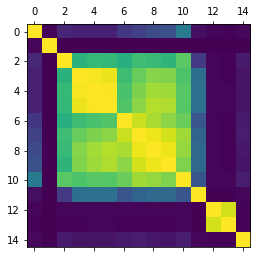

In [25]:
#Correlation table
plt.matshow(continuos_variable.corr())
plt.show()

From Correlation table we find that<br>
Feature forecast_3_month,forecast_6_month,forecast_9_month are highly correlated<br>
perf_6_month_avg,perf_12_month_avg are highly correlated<br>
sales_1_month,sales_3_month,sales_6_month,sales_9_month are correlated<br>


<b>Colinearity</b> is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values. In python this can by accomplished by using numpy's corrcoef function.<br>

Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.<br>

A common R function used for testing regression assumptions and specifically multicolinearity is "VIF()" and unlike many statistical concepts, its formula is straightforward:<br>

V.I.F. = 1 / (1 - R^2)<br>

The <b>Variance Inflation Factor (VIF)</b> is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

In [26]:
#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(continuos_variable.values, i) for i in range(continuos_variable.shape[1])]
vif["features"] = continuos_variable.columns

In [27]:
vif 

,VIF Factor,features
0,1.845352,national_inv
1,2.114718,lead_time
2,2.866972,in_transit_qty
3,87.633362,forecast_3_month
4,492.922128,forecast_6_month
5,275.176237,forecast_9_month
6,7.096840,sales_1_month
7,55.142726,sales_3_month
8,101.114513,sales_6_month
9,22.944864,sales_9_month


In [28]:
#Removing perf_12_month_avg
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg'],axis=1)
vif_1 = pd.DataFrame()
vif_1["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_1["features"] = continuos_variable_1.columns

In [29]:
vif_1

,VIF Factor,features
0,1.845335,national_inv
1,2.103110,lead_time
2,2.866946,in_transit_qty
3,87.632253,forecast_3_month
4,492.917385,forecast_6_month
5,275.173623,forecast_9_month
6,7.096836,sales_1_month
7,55.142069,sales_3_month
8,101.112074,sales_6_month
9,22.944864,sales_9_month


In [30]:
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg','forecast_6_month'],axis=1)
vif_2 = pd.DataFrame()
vif_2["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_2["features"] = continuos_variable_1.columns

In [31]:
vif_2

,VIF Factor,features
0,1.844470,national_inv
1,2.103109,lead_time
2,2.654278,in_transit_qty
3,27.299326,forecast_3_month
4,49.529381,forecast_9_month
5,7.091127,sales_1_month
6,55.065493,sales_3_month
7,99.944894,sales_6_month
8,22.944840,sales_9_month
9,7.015119,min_bank


In [32]:
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg','forecast_6_month','forecast_9_month'],axis=1)
vif_3 = pd.DataFrame()
vif_3["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_3["features"] = continuos_variable_1.columns

In [33]:
vif_3

,VIF Factor,features
0,1.725577,national_inv
1,2.103006,lead_time
2,2.583366,in_transit_qty
3,4.105479,forecast_3_month
4,7.010137,sales_1_month
5,49.340089,sales_3_month
6,75.348014,sales_6_month
7,22.942683,sales_9_month
8,6.920735,min_bank
9,1.180907,pieces_past_due


In [34]:
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg','forecast_6_month','forecast_9_month',"sales_9_month"],axis=1)
vif_4 = pd.DataFrame()
vif_4["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_4["features"] = continuos_variable_1.columns

In [35]:
vif_4

,VIF Factor,features
0,1.721171,national_inv
1,2.102998,lead_time
2,2.583047,in_transit_qty
3,4.102966,forecast_3_month
4,7.009569,sales_1_month
5,45.919017,sales_3_month
6,34.040760,sales_6_month
7,6.920099,min_bank
8,1.180892,pieces_past_due
9,2.105892,perf_6_month_avg


In [36]:
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg','forecast_6_month','forecast_9_month',"sales_9_month","sales_6_month"],axis=1)
vif_5 = pd.DataFrame()
vif_5["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_5["features"] = continuos_variable_1.columns

In [37]:
vif_5

,VIF Factor,features
0,1.527560,national_inv
1,2.102986,lead_time
2,2.582870,in_transit_qty
3,2.818817,forecast_3_month
4,6.466516,sales_1_month
5,10.925490,sales_3_month
6,6.562656,min_bank
7,1.180610,pieces_past_due
8,2.105762,perf_6_month_avg
9,1.006627,local_bo_qty


In [38]:
continuos_variable_1=continuos_variable.drop(['perf_12_month_avg','forecast_6_month','forecast_9_month',"sales_9_month","sales_6_month",'sales_1_month'],axis=1)
vif_6 = pd.DataFrame()
vif_6["VIF Factor"] = [variance_inflation_factor(continuos_variable_1.values, i) for i in range(continuos_variable_1.shape[1])]
vif_6["features"] = continuos_variable_1.columns

In [39]:
vif_6

,VIF Factor,features
0,1.525936,national_inv
1,2.102985,lead_time
2,2.582322,in_transit_qty
3,2.816367,forecast_3_month
4,4.738734,sales_3_month
5,6.556546,min_bank
6,1.174795,pieces_past_due
7,2.105754,perf_6_month_avg
8,1.006557,local_bo_qty


In [40]:
continuos_variable_1.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_3_month,min_bank,pieces_past_due,perf_6_month_avg,local_bo_qty
national_inv,1.000000,0.003327,0.098473,0.080034,0.191604,0.405298,0.030307,0.003901,0.012814
lead_time,0.003327,1.000000,-0.006929,-0.007927,-0.006739,-0.007075,-0.001563,-0.006952,-0.001578
in_transit_qty,0.098473,-0.006929,1.000000,0.638241,0.687824,0.742187,0.161349,0.004295,0.063223
forecast_3_month,0.080034,-0.007927,0.638241,1.000000,0.764681,0.719626,0.359632,0.006065,0.043872
sales_3_month,0.191604,-0.006739,0.687824,0.764681,1.000000,0.854285,0.314536,0.006882,0.068080
min_bank,0.405298,-0.007075,0.742187,0.719626,0.854285,1.000000,0.262834,0.010274,0.071582
pieces_past_due,0.030307,-0.001563,0.161349,0.359632,0.314536,0.262834,1.000000,-0.004457,0.009388
perf_6_month_avg,0.003901,-0.006952,0.004295,0.006065,0.006882,0.010274,-0.004457,1.000000,0.002165
local_bo_qty,0.012814,-0.001578,0.063223,0.043872,0.068080,0.071582,0.009388,0.002165,1.000000


<b>Data After dim_reduction

In [41]:
Final_red_data=merged_data.drop(['perf_12_month_avg','forecast_6_month','forecast_9_month',"sales_9_month","sales_6_month",'sales_1_month'],axis=1)

In [42]:
Final_red_data.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_3_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,anymissing
0,0.0,8.0,0.0,0.0,0.0,0.0,0,0.0,0.85,0.0,0,0,0,1,0,0,1
1,2.0,9.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.0,0,0,0,1,0,0,0
2,2.0,8.0,0.0,0.0,0.0,0.0,0,0.0,0.85,0.0,1,0,0,1,0,0,1
3,7.0,8.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.0,0,0,0,1,0,0,0
4,8.0,8.0,0.0,0.0,0.0,2.0,0,0.0,0.85,0.0,1,0,0,1,0,0,1


##  A Review on Imbalanced Learning Methods

### Introuction
- Imbalanced classification is a supervised learning problem where one class outnumbers other class by a large proportion. This problem is faced more frequently in binary classification problems than multi-level classification problems. The reasons which leads to reduction in **accuracy** of ML algorithms on imbalanced data sets:

    1. ML algorithms struggle with accuracy because of the unequal distribution in dependent variable.
    2. This causes the performance of existing classifiers to get biased towards majority class.
    3. The algorithms are accuracy driven i.e. they aim to minimize the overall error to which the minority class contributes very little.
    4. ML algorithms assume that the data set has balanced class distributions.
    5. They also assume that errors obtained from different classes have same cost

In [43]:
#Splitting the data into training as well as testing set
X, y = merged_data.drop(['went_on_backorder'],axis=1), merged_data.went_on_backorder
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(merged_data.shape)
print(len(X_train)+len(X_test))

(1447451, 22)
(482484, 22)
(1447451,)
(482484,)
(1929935, 23)
1929935


<b>Checking the accuracy if we predict all the products are not on bacorder that is class 0

In [45]:
from sklearn.dummy import DummyClassifier
# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
dummy_majority.score(X_test, y_test)

0.99279561602042765

We get the accuracy very high but it is unable to predict the product which is on backorder(Class 1).

# Model selection using evaluation metrics

 ## _K_-Fold Cross Validation
In  _K_-fold cross-validation (CV), we randomly split the training dataset into  _K_
  folds without replacement, where  _K−1_
  folds are used for the model training and the remaining 1 fold is for testing. This procedure is repeated  _K_
  times so that we obtain  _K_
  models and  _K_ performance estimates. Then we take their **average** as the final performance estimate.


###  Hierarchy of sampling-based methods.
1. Under-sampling

 Under-sampling methods reduces the number of samples from the majority class in order to balance between majority and minority classes. However, the main drawback of under-sampling is that it may miss some important infomations.
    
2. Oversampling

 On the opposite of **Under-sampling**, Oversampling methods add the samples to original imbalanced data set.
    - <b>Pros:</b> Leads to no information loss. 
    - <b>Cons:</b> Oversampling simply adds replicated observations in original data set, it ends up adding multiple observations of several types, thus leading to overfitting. Although, the training accuracy of such data set will be high, but the accuracy on unseen data will be worse.



# sampling to get balanced data

# SMOTE

In [48]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split,KFold, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,\
recall_score,classification_report,accuracy_score,precision_score,f1_score,make_scorer,average_precision_score

In [49]:
X = merged_data.drop('went_on_backorder', axis=1).values
y = merged_data['went_on_backorder'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1350954, 22) (1350954,)
(578981, 22) (578981,)


<b> For full data

In [74]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
sm = SMOTE(ratio='auto', random_state=np.random.randint(100), k_neighbors=5, 
              m_neighbors=10, kind='regular', n_jobs=-1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 9799
Before OverSampling, counts of label '0': 1341155 

After OverSampling, the shape of train_X: (2682310, 22)
After OverSampling, the shape of train_y: (2682310,) 

After OverSampling, counts of label '1': 1341155
After OverSampling, counts of label '0': 1341155


<b>For Feature selected data

In [51]:
x_final = Final_red_data.drop('went_on_backorder', axis=1).values
y_final = Final_red_data['went_on_backorder'].values
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(x_final, y_final, test_size=0.3)
print (X_train_final.shape, y_train_final.shape)
print (X_test_final.shape, y_test_final.shape)

(1350954, 16) (1350954,)
(578981, 16) (578981,)


In [75]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train_final==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_final==0)))

sm = SMOTE(ratio='auto', random_state=np.random.randint(100), k_neighbors=5, 
              m_neighbors=10, kind='regular', n_jobs=-1)
X_train_over, y_train_over = sm.fit_sample(X_train_final, y_train_final.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over==0)))

Before OverSampling, counts of label '1': 9804
Before OverSampling, counts of label '0': 1341150 

After OverSampling, the shape of train_X: (2682300, 16)
After OverSampling, the shape of train_y: (2682300,) 

After OverSampling, counts of label '1': 1341150
After OverSampling, counts of label '0': 1341150


In [76]:
len(X_test_final)

578981

# Modeling

###  Evaluation Metric: ROC curves, Area-Under-Curve (AUC)

## optimised Random Forest

<b>For Full Features

In [54]:
len(X_test)

578981

MaxDepth = 2.00  accuracy = 0.73   AUC = 0.8887
MaxDepth = 4.00  accuracy = 0.84   AUC = 0.9112
MaxDepth = 6.00  accuracy = 0.87   AUC = 0.9252
MaxDepth = 8.00  accuracy = 0.89   AUC = 0.9323
MaxDepth = 10.00  accuracy = 0.90   AUC = 0.9371
MaxDepth = 15.00  accuracy = 0.94   AUC = 0.9428
MaxDepth = 20.00  accuracy = 0.97   AUC = 0.9412


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


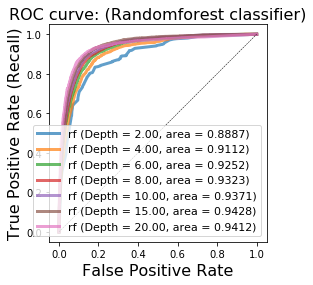

Wall time: 27min 33s


In [56]:
%%time
for g in [2, 4, 6,8,10,15,20]:
    rf = RandomForestClassifier(max_depth=g,random_state=0).fit(X_train_res, y_train_res)
    y_score_rf = rf.predict_proba(X_test)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf[:,1])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    accuracy_rf = rf.score(X_test, y_test)
    print("MaxDepth = {:.2f}  accuracy = {:.2f}   AUC = {:.4f}".format(g, accuracy_rf, 
                                                                    roc_auc_rf))
    plt.plot(fpr_rf, tpr_rf, lw=3, alpha=0.7, 
             label='rf (Depth = {:0.2f}, area = {:0.4f})'.format(g, roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Randomforest classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

<b>For Feature selected data

MaxDepth = 2.0000  accuracy = 0.8478   AUC = 0.8893
MaxDepth = 4.0000  accuracy = 0.8404   AUC = 0.9043
MaxDepth = 6.0000  accuracy = 0.8623   AUC = 0.9136
MaxDepth = 8.0000  accuracy = 0.8861   AUC = 0.9235
MaxDepth = 10.0000  accuracy = 0.8950   AUC = 0.9328
MaxDepth = 15.0000  accuracy = 0.9284   AUC = 0.9369
MaxDepth = 20.0000  accuracy = 0.9549   AUC = 0.9276


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


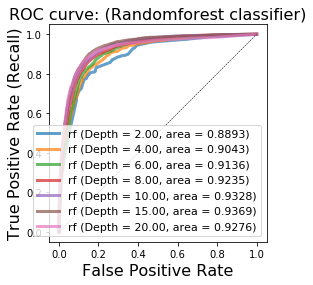

In [59]:
for g in [2, 4, 6,8,10,15,20]:
    rf = RandomForestClassifier(max_depth=g,random_state=0).fit(X_train_over, y_train_over)
    y_score_rf = rf.predict_proba(X_test_final)
    fpr_rf, tpr_rf, _ = roc_curve(y_test_final, y_score_rf[:,1])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    accuracy_rf = rf.score(X_test_final, y_test_final)
    print("MaxDepth = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(g, accuracy_rf, 
                                                                    roc_auc_rf))
    plt.plot(fpr_rf, tpr_rf, lw=3, alpha=0.7, 
             label='rf (Depth = {:0.2f}, area = {:0.4f})'.format(g, roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Randomforest classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [60]:
%%time
rf = RandomForestClassifier(max_depth=15,random_state=0).fit(X_train_over, y_train_over)
y_score_rf = rf.predict_proba(X_test_final)

Wall time: 4min 52s


0.928448429223
0.936916892034
MaxDepth = 15.00  accuracy = 0.93   AUC = 0.9369


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


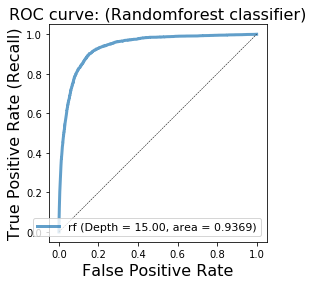

In [66]:
fpr_rf, tpr_rf, _ = roc_curve(y_test_final, y_score_rf[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
accuracy_rf = rf.score(X_test_final, y_test_final)
print(accuracy_rf)
print(roc_auc_rf)
print("MaxDepth = {:.2f}  accuracy = {:.2f}   AUC = {:.4f}".format(15, accuracy_rf, roc_auc_rf))
plt.plot(fpr_rf, tpr_rf, lw=3, alpha=0.7, label='rf (Depth = {:0.2f}, area = {:0.4f})'.format(15, roc_auc_rf))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Randomforest classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
plt.show()

Average precision-recall score: 0.17


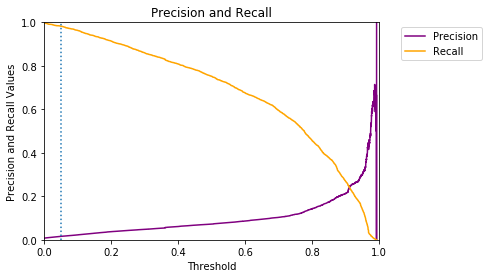

In [67]:
precision, recall, thresholds = precision_recall_curve(y_test_final, y_score_rf[:,1])
average_precision = average_precision_score(y_test_final, y_score_rf[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.05,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [64]:
y_prob_test=pd.DataFrame(y_score_rf[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.4 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test_final, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          522769  52035   574804
1             799   3378     4177
__all__    523568  55413   578981


<b>For Full Feature

In [69]:
%%time
rf = RandomForestClassifier(max_depth=15,random_state=0).fit(X_train_res, y_train_res)
y_score_rf = rf.predict_proba(X_test)

Wall time: 5min 52s


0.938770011451
0.942837608102
MaxDepth = 15.0000  accuracy = 0.9388   AUC = 0.9428


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


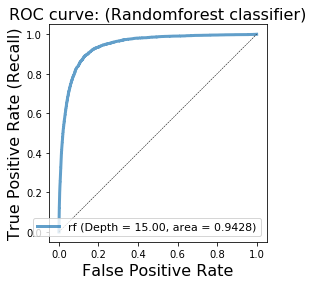

In [70]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
accuracy_rf = rf.score(X_test, y_test)
print(accuracy_rf)
print(roc_auc_rf)
print("MaxDepth = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(15, accuracy_rf, roc_auc_rf))
plt.plot(fpr_rf, tpr_rf, lw=3, alpha=0.7, label='rf (Depth = {:0.2f}, area = {:0.4f})'.format(15, roc_auc_rf))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Randomforest classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
plt.show()

Average precision-recall score: 0.17


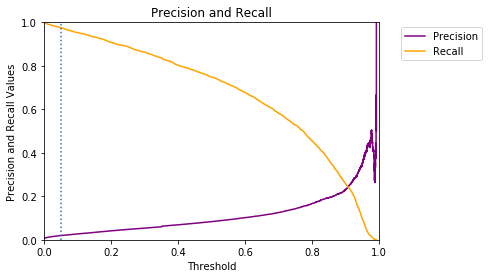

In [71]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score_rf[:,1])
average_precision = average_precision_score(y_test, y_score_rf[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.05,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [72]:
y_prob_test=pd.DataFrame(y_score_rf[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.5 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          540399  34400   574799
1            1051   3131     4182
__all__    541450  37531   578981


In [73]:
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.4 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          529459  45340   574799
1             825   3357     4182
__all__    530284  48697   578981


In [86]:
#Recall
2752/4194

0.6561754887935145

In [87]:
#Precision
2752/14918

0.184475130714573

# CART(Classification and Regression Tree)

In [78]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#### For Full Feature

min_samples_split = 200.0000  accuracy = 0.9731   AUC = 0.8685
min_samples_split = 250.0000  accuracy = 0.9696   AUC = 0.8762
min_samples_split = 300.0000  accuracy = 0.9669   AUC = 0.8812
min_samples_split = 400.0000  accuracy = 0.9628   AUC = 0.8902
min_samples_split = 500.0000  accuracy = 0.9599   AUC = 0.8919
min_samples_split = 600.0000  accuracy = 0.9564   AUC = 0.8960
min_samples_split = 700.0000  accuracy = 0.9537   AUC = 0.8997
min_samples_split = 800.0000  accuracy = 0.9510   AUC = 0.9002
min_samples_split = 900.0000  accuracy = 0.9478   AUC = 0.9030
min_samples_split = 1000.0000  accuracy = 0.9464   AUC = 0.9048


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


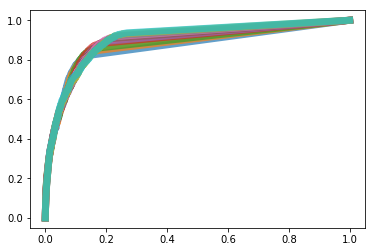

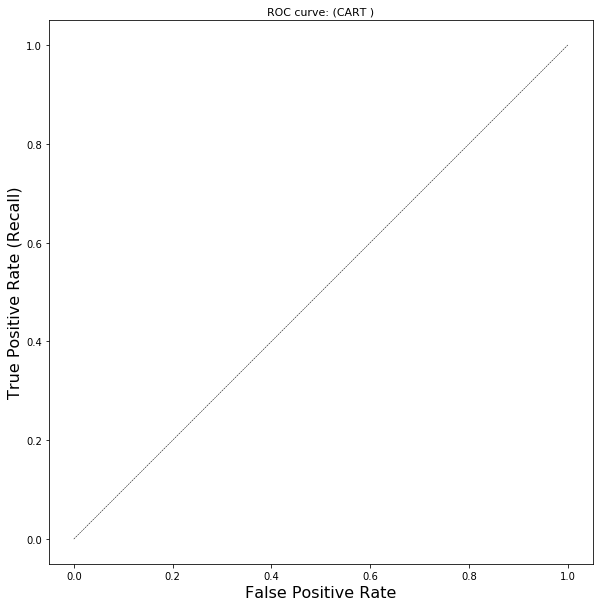

In [79]:
for g in [200,250,300,400,500,600,700,800,900,1000]:
    dt = DecisionTreeClassifier(criterion = "gini",min_samples_split=g, random_state=0).fit(X_train_res, y_train_res)
    y_score_dt = dt.predict_proba(X_test)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt[:,1])
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    accuracy_dt = dt.score(X_test, y_test)
    print("min_samples_split = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(g, accuracy_dt, 
                                                                    roc_auc_dt))
    plt.plot(fpr_dt, tpr_dt, lw=3, alpha=0.7, 
             label='dt(min_samples_split = {:0.4f}, area = {:0.4f})'.format(g, roc_auc_dt))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (CART )', fontsize=11)
plt.axes().set_aspect('equal')
plt.show()

min_samples_split = 200.0000 max_depth5.0000 accuracy = 0.8993   AUC = 0.9115
min_samples_split = 200.0000 max_depth10.0000 accuracy = 0.9089   AUC = 0.9152
min_samples_split = 200.0000 max_depth12.0000 accuracy = 0.9239   AUC = 0.9059
min_samples_split = 200.0000 max_depth15.0000 accuracy = 0.9439   AUC = 0.9014
min_samples_split = 200.0000 max_depth20.0000 accuracy = 0.9633   AUC = 0.8912


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


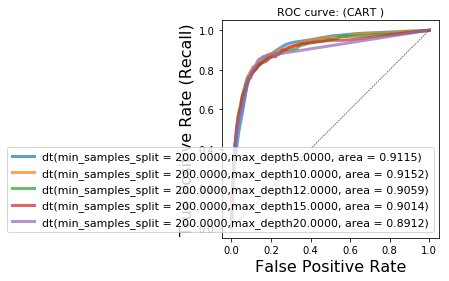

In [80]:
for g in [5,10,12,15,20]:
    dt = DecisionTreeClassifier(criterion = "gini",min_samples_split=200, random_state=0,max_depth=g).fit(X_train_res, y_train_res)
    y_score_dt = dt.predict_proba(X_test)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt[:,1])
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    accuracy_dt = dt.score(X_test, y_test)
    print("min_samples_split = {:.4f} max_depth{:.4f} accuracy = {:.4f}   AUC = {:.4f}".format(200,g, accuracy_dt, 
                                                                    roc_auc_dt))
    plt.plot(fpr_dt, tpr_dt, lw=3, alpha=0.7, 
             label='dt(min_samples_split = {:0.4f},max_depth{:.4f}, area = {:0.4f})'.format(200,g, roc_auc_dt))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (CART )', fontsize=11)
plt.axes().set_aspect('equal')
plt.show()

In [93]:
%%time
#optimised tree training
dt = DecisionTreeClassifier(criterion = "gini",min_samples_split=200, random_state=0,max_depth=10).fit(X_train_res, y_train_res)
y_score_dt = dt.predict_proba(X_test)

Wall time: 2min 7s


0.908927926823
0.915198517206
min_samples_split = 200.0000 max_depth= 10.0000accuracy = 0.9089   AUC = 0.9152


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


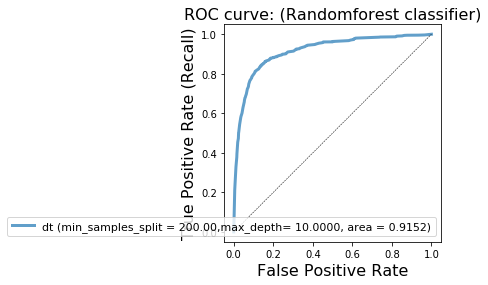

In [94]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
accuracy_dt = dt.score(X_test, y_test)
print(accuracy_dt)
print(roc_auc_dt)
print("min_samples_split = {:.4f} max_depth= {:.4f}accuracy = {:.4f}   AUC = {:.4f}".format(200,10, accuracy_dt, roc_auc_dt))
plt.plot(fpr_dt, tpr_dt, lw=3, alpha=0.7, label='dt (min_samples_split = {:0.2f},max_depth= {:.4f}, area = {:0.4f})'.format(200,10,roc_auc_dt))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Randomforest classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

Average precision-recall score: 0.13


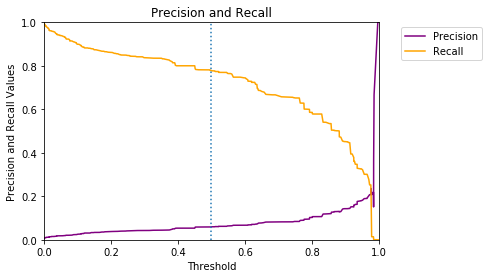

In [89]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score_dt[:,1])
average_precision = average_precision_score(y_test, y_score_dt[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.5,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [85]:
y_prob_test=pd.DataFrame(y_score_dt[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.5 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          522993  51806   574799
1             925   3257     4182
__all__    523918  55063   578981


In [87]:
print('precision:',(3257/55063))
print('recall',(3257/4182))

precision: 0.05915042769191653
recall 0.7788139646102343


<b>For Feature Selected data

min_samples_split = 200.0000  accuracy = 0.9632   AUC = 0.8653
min_samples_split = 250.0000  accuracy = 0.9600   AUC = 0.8737
min_samples_split = 300.0000  accuracy = 0.9561   AUC = 0.8772
min_samples_split = 400.0000  accuracy = 0.9513   AUC = 0.8850
min_samples_split = 500.0000  accuracy = 0.9483   AUC = 0.8923
min_samples_split = 600.0000  accuracy = 0.9445   AUC = 0.8964
min_samples_split = 700.0000  accuracy = 0.9420   AUC = 0.8995
min_samples_split = 800.0000  accuracy = 0.9392   AUC = 0.9006
min_samples_split = 900.0000  accuracy = 0.9367   AUC = 0.9037
min_samples_split = 1000.0000  accuracy = 0.9341   AUC = 0.9041


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


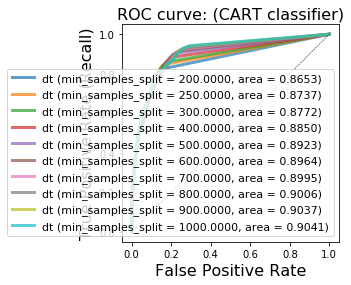

In [90]:
for g in [200,250,300,400,500,600,700,800,900,1000]:
    dt = DecisionTreeClassifier(criterion = "gini",min_samples_split=g, random_state=0).fit(X_train_over, y_train_over)
    y_score_dt = dt.predict_proba(X_test_final)
    fpr_dt, tpr_dt, _ = roc_curve(y_test_final, y_score_dt[:,1])
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    accuracy_dt = dt.score(X_test_final, y_test_final)
    print("min_samples_split = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(g, accuracy_dt, 
                                                                    roc_auc_dt))
    plt.plot(fpr_dt, tpr_dt, lw=3, alpha=0.7, 
             label='dt (min_samples_split = {:0.4f}, area = {:0.4f})'.format(g, roc_auc_dt))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (CART classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

min_samples_split = 1000.0000 max_depth=5.0000 accuracy = 0.8512   AUC = 0.9120
min_samples_split = 1000.0000 max_depth=10.0000 accuracy = 0.8894   AUC = 0.9168
min_samples_split = 1000.0000 max_depth=12.0000 accuracy = 0.9079   AUC = 0.9157
min_samples_split = 1000.0000 max_depth=15.0000 accuracy = 0.9181   AUC = 0.9153
min_samples_split = 1000.0000 max_depth=20.0000 accuracy = 0.9283   AUC = 0.9114


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


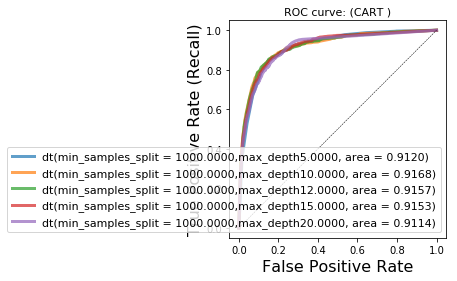

In [91]:
for g in [5,10,12,15,20]:
    dt = DecisionTreeClassifier(criterion = "gini",min_samples_split=1000, random_state=0,max_depth=g).fit(X_train_over, y_train_over)
    y_score_dt = dt.predict_proba(X_test_final)
    fpr_dt, tpr_dt, _ = roc_curve(y_test_final, y_score_dt[:,1])
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    accuracy_dt = dt.score(X_test_final, y_test_final)
    print("min_samples_split = {:.4f} max_depth={:.4f} accuracy = {:.4f}   AUC = {:.4f}".format(1000,g, accuracy_dt, 
                                                                    roc_auc_dt))
    plt.plot(fpr_dt, tpr_dt, lw=3, alpha=0.7, 
             label='dt(min_samples_split = {:0.4f},max_depth{:.4f}, area = {:0.4f})'.format(1000,g, roc_auc_dt))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (CART )', fontsize=11)
plt.axes().set_aspect('equal')
plt.show()

In [95]:
%%time
dt = DecisionTreeClassifier(criterion = "gini",min_samples_split=1000, random_state=0,max_depth=10).fit(X_train_over, y_train_over)
y_score_dt = dt.predict_proba(X_test_final)

Wall time: 1min 13s


min_sample_split=1000.0000 MaxDepth = 10.0000  accuracy = 0.8894   AUC = 0.9168


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


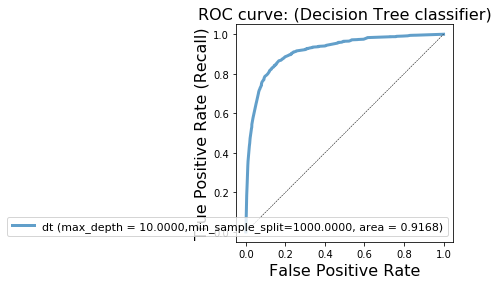

In [96]:
fpr_dt, tpr_dt, _ = roc_curve(y_test_final, y_score_dt[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
accuracy_dt = dt.score(X_test_final, y_test_final)
print("min_sample_split={:.4f} MaxDepth = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(1000,10, accuracy_dt, roc_auc_dt))
plt.plot(fpr_dt, tpr_dt, lw=3, alpha=0.7, label='dt (max_depth = {:0.4f},min_sample_split={:.4f}, area = {:0.4f})'.format(10,1000, roc_auc_dt))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Decision Tree classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()


Average precision-recall score: 0.13


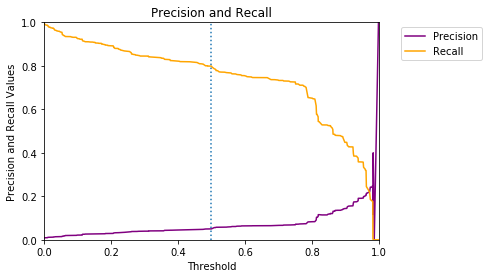

In [98]:
precision, recall, thresholds = precision_recall_curve(y_test_final, y_score_dt[:,1])
average_precision = average_precision_score(y_test_final, y_score_dt[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.5,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [99]:
y_prob_test=pd.DataFrame(y_score_dt[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.5 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test_final, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          511620  63184   574804
1             840   3337     4177
__all__    512460  66521   578981


In [100]:
print("recall",3337/4177)
print("precision",3337/63184)

recall 0.798898731146756
precision 0.05281400354520132


# AdaboostClassifiers

<b>Tuned Adaboost

In [101]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<b>For Merged Data

learning_rate = 0.0010  accuracy = 0.7030   AUC = 0.7736
learning_rate = 0.0100  accuracy = 0.7030   AUC = 0.8670
learning_rate = 0.1000  accuracy = 0.8472   AUC = 0.9132
learning_rate = 0.5000  accuracy = 0.8789   AUC = 0.9233
learning_rate = 1.0000  accuracy = 0.8956   AUC = 0.9220


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


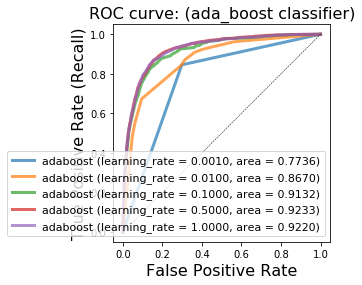

In [102]:
for g in [0.001,0.01,0.1,0.5,1]:
    ada_dt=AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=g, 
                              algorithm='SAMME.R', random_state=None).fit(X_train_res, y_train_res)
    y_score_ada_dt = ada_dt.predict_proba(X_test)
    fpr_ada_dt, tpr_ada_dt, _ = roc_curve(y_test, y_score_ada_dt[:,1])
    roc_auc_ada_dt = auc(fpr_ada_dt, tpr_ada_dt)
    accuracy_ada_dt = ada_dt.score(X_test, y_test)
    print("learning_rate = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(g, accuracy_ada_dt, 
                                                                    roc_auc_ada_dt))
    plt.plot(fpr_ada_dt, tpr_ada_dt, lw=3, alpha=0.7, 
             label='adaboost (learning_rate = {:0.4f}, area = {:0.4f})'.format(g, roc_auc_ada_dt))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (ada_boost classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [103]:
%%time
#optimised adaboosted tree training
ada_dt=AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=0.5, 
                              algorithm='SAMME.R', random_state=None).fit(X_train_res, y_train_res)
y_score_ada_dt = ada_dt.predict_proba(X_test)

Wall time: 15min 8s


learning_rate= 0.5000  accuracy = 0.8789   AUC = 0.9233


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


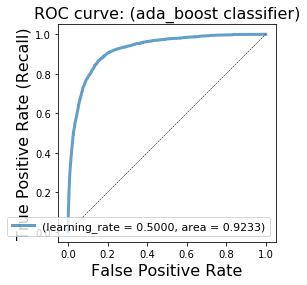

In [105]:
fpr_ada_dt, tpr_ada_dt, _ = roc_curve(y_test, y_score_ada_dt[:,1])
roc_auc_ada_dt = auc(fpr_ada_dt, tpr_ada_dt)
accuracy_ada_dt = ada_dt.score(X_test, y_test)
print("learning_rate= {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(0.5, accuracy_ada_dt, 
                                                                    roc_auc_ada_dt))
plt.plot(fpr_ada_dt, tpr_ada_dt, lw=3, alpha=0.7, 
             label='(learning_rate = {:0.4f}, area = {:0.4f})'.format(0.5, roc_auc_ada_dt))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (ada_boost classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

Average precision score: 0.1320 


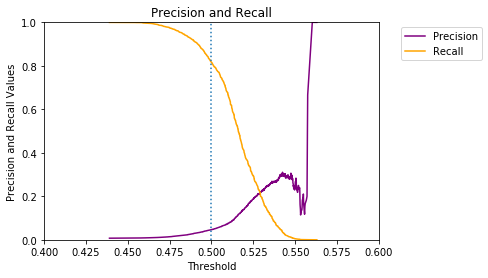

In [108]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score_ada_dt[:,1])
average_precision = average_precision_score(y_test, y_score_ada_dt[:,1])
print('Average precision score: {0:0.4f} '.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.5,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0.4,0.6])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [109]:
y_score_ada_dt[:,1]

array([ 0.5158521 ,  0.51715572,  0.48351747, ...,  0.48170161,
        0.4618785 ,  0.46184184])

In [110]:
y_prob_test=pd.DataFrame(y_score_ada_dt[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.5 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          505440  69359   574799
1             769   3413     4182
__all__    506209  72772   578981


In [111]:
print('recall',3413/4182)

recall 0.8161166905786705


In [112]:
print('precision',3413/72772)

precision 0.04689990655746716


<b>For Feature selected data

learning_rate = 0.0010  accuracy = 0.7029   AUC = 0.7787
learning_rate = 0.0100  accuracy = 0.7029   AUC = 0.8637
learning_rate = 0.1000  accuracy = 0.8489   AUC = 0.9109
learning_rate = 0.5000  accuracy = 0.8746   AUC = 0.9236
learning_rate = 1.0000  accuracy = 0.8840   AUC = 0.9217


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


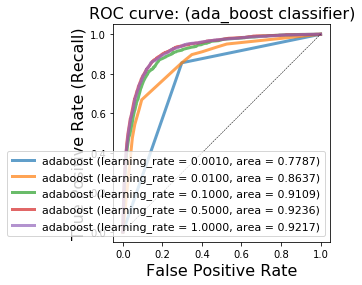

In [114]:
for g in [0.001,0.01,0.1,0.5,1]:
    ada_dt=AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=g, 
                              algorithm='SAMME.R', random_state=None).fit(X_train_over, y_train_over)
    y_score_ada_dt = ada_dt.predict_proba(X_test_final)
    fpr_ada_dt, tpr_ada_dt, _ = roc_curve(y_test_final, y_score_ada_dt[:,1])
    roc_auc_ada_dt = auc(fpr_ada_dt, tpr_ada_dt)
    accuracy_ada_dt = ada_dt.score(X_test_final, y_test_final)
    print("learning_rate = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(g, accuracy_ada_dt, 
                                                                    roc_auc_ada_dt))
    plt.plot(fpr_ada_dt, tpr_ada_dt, lw=3, alpha=0.7, 
             label='adaboost (learning_rate = {:0.4f}, area = {:0.4f})'.format(g, roc_auc_ada_dt))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (ada_boost classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [117]:
%%time
ada_dt =AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=0.5, 
                              algorithm='SAMME.R', random_state=None).fit(X_train_over, y_train_over)
y_score_ada_dt = ada_dt.predict_proba(X_test_final)

Wall time: 7min 33s


0.874564104867
0.92358626003
learning_rate = 0.5000  accuracy = 0.8746   AUC = 0.9236


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


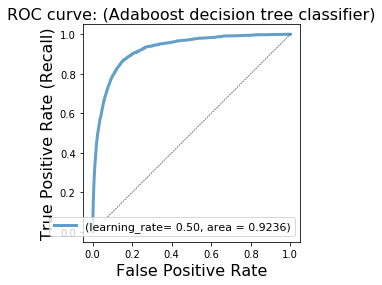

In [118]:
fpr_ada_dt, tpr_ada_dt, _ = roc_curve(y_test_final, y_score_ada_dt[:,1])
roc_auc_ada_dt = auc(fpr_ada_dt, tpr_ada_dt)
accuracy_ada_dt = ada_dt.score(X_test_final, y_test_final)
print(accuracy_ada_dt)
print(roc_auc_ada_dt)
print("learning_rate = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(0.5, accuracy_ada_dt, roc_auc_ada_dt))
plt.plot(fpr_ada_dt, tpr_ada_dt, lw=3, alpha=0.7, label='(learning_rate= {:0.2f}, area = {:0.4f})'.format(0.5, roc_auc_ada_dt))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Adaboost decision tree classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
plt.show()

Average precision-recall score: 0.14


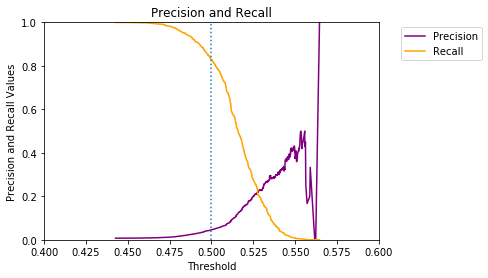

In [123]:
precision, recall, thresholds = precision_recall_curve(y_test_final, y_score_ada_dt[:,1])
average_precision = average_precision_score(y_test_final, y_score_ada_dt[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.5,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0.4,.6])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [124]:
y_prob_test=pd.DataFrame(y_score_ada_dt[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.5 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test_final, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          502888  71916   574804
1             709   3468     4177
__all__    503597  75384   578981


In [125]:
#Recall
print('recall',3468/4194)

recall 0.82689556509299


<h1>Optimised Logistic Regression</h1>

<b>for merged data

l2 regularised logistic regression

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


C = 0.0100  accuracy = 0.7908   AUC = 0.8724
C = 0.0500  accuracy = 0.7169   AUC = 0.8563
C = 0.1000  accuracy = 0.6639   AUC = 0.8429
C = 0.5000  accuracy = 0.7126   AUC = 0.8558
C = 1.0000  accuracy = 0.7100   AUC = 0.8547


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


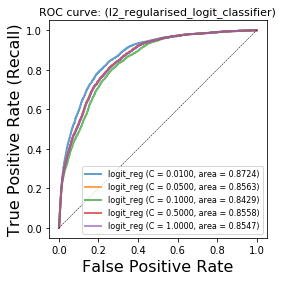

Wall time: 31min 23s


In [127]:
%%time
for c in [0.01,0.05,0.1,0.5,1]:#iterating using maxdepth
    logit_reg = LogisticRegression(penalty = 'l2', C = c,class_weight=None).fit(X_train_res, y_train_res)
    y_score_logit_reg = logit_reg.predict_proba(X_test)
    fpr_logit_reg, tpr_logit_reg, _ = roc_curve(y_test, y_score_logit_reg[:,1])
    roc_auc_logit_reg = auc(fpr_logit_reg, tpr_logit_reg)
    accuracy_logit_reg = logit_reg.score(X_test, y_test)
    print("C = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(c, accuracy_logit_reg, 
                                                                    roc_auc_logit_reg))
    plt.plot(fpr_logit_reg, tpr_logit_reg, lw=2, alpha=0.7, 
             label='logit_reg (C = {:0.4f}, area = {:0.4f})'.format(c,roc_auc_logit_reg))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=8)
plt.title('ROC curve: (l2_regularised_logit_classifier)', fontsize=11)
plt.axes().set_aspect('equal')
plt.show()

In [132]:
%%time
#optimised log_reg training
logit_reg = LogisticRegression(penalty = 'l2', C = 0.05,class_weight=None).fit(X_train_res, y_train_res)
y_score_logit_reg = logit_reg.predict_proba(X_test)

Wall time: 6min 19s


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


C= 0.0500  accuracy = 0.7169   AUC = 0.8563


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


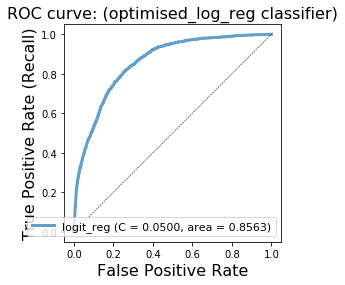

In [133]:
fpr_logit_reg, tpr_logit_reg, _ = roc_curve(y_test, y_score_logit_reg[:,1])
roc_auc_logit_reg = auc(fpr_logit_reg, tpr_logit_reg)
accuracy_logit_reg = logit_reg.score(X_test, y_test)
print("C= {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(0.05, accuracy_logit_reg, 
                                                                    roc_auc_logit_reg))
plt.plot(fpr_logit_reg, tpr_logit_reg, lw=3, alpha=0.7, 
             label='logit_reg (C = {:0.4f}, area = {:0.4f})'.format(0.05,roc_auc_logit_reg))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (optimised_log_reg classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

Average precision score: 0.0531 


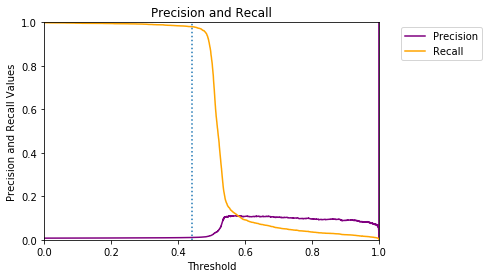

In [134]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score_logit_reg[:,1])
average_precision = average_precision_score(y_test, y_score_logit_reg[:,1])
print('Average precision score: {0:0.4f} '.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.443,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [131]:
y_prob_test=pd.DataFrame(y_score_logit_reg[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.5 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0       1  __all__
Actual                            
0          407568  167231   574799
1             680    3502     4182
__all__    408248  170733   578981


<b>For Uncorrelated Data

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


C = 0.0100  accuracy = 0.5504   AUC = 0.9010
C = 0.0500  accuracy = 0.6588   AUC = 0.8942
C = 0.1000  accuracy = 0.7093   AUC = 0.8941
C = 0.5000  accuracy = 0.8996   AUC = 0.8515
C = 1.0000  accuracy = 0.9073   AUC = 0.8770


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


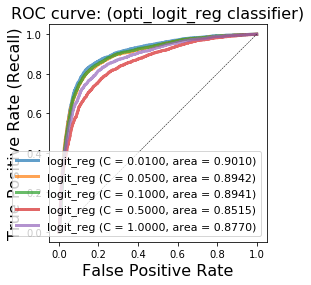

Wall time: 46min 43s


In [223]:
%%time
for c in [0.01,0.05,0.1,0.5,1]:#iterating using maxdepth
    logit_reg = LogisticRegression(penalty = 'l2', C = c,class_weight=None).fit(X_train_over, y_train_final)
    y_score_logit_reg = logit_reg.predict_proba(X_test_final)
    fpr_logit_reg, tpr_logit_reg, _ = roc_curve(y_test_final, y_score_logit_reg[:,1])
    roc_auc_logit_reg = auc(fpr_logit_reg, tpr_logit_reg)
    accuracy_logit_reg = logit_reg.score(X_test_final, y_test_final)
    print("C = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(c, accuracy_logit_reg, 
                                                                    roc_auc_logit_reg))
    plt.plot(fpr_logit_reg, tpr_logit_reg, lw=3, alpha=0.7, 
             label='logit_reg (C = {:0.4f}, area = {:0.4f})'.format(c,roc_auc_logit_reg))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (opti_logit_reg classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [137]:
%%time
#optimised adaboosted tree training
logit_reg = LogisticRegression(penalty = 'l2', C = 0.01,class_weight=None).fit(X_train_over, y_train_over)
y_score_logit_reg = logit_reg.predict_proba(X_test_final)
fpr_logit_reg, tpr_logit_reg, _ = roc_curve(y_test_final, y_score_logit_reg[:,1])
roc_auc_logit_reg = auc(fpr_logit_reg, tpr_logit_reg)
accuracy_logit_reg = logit_reg.score(X_test_final, y_test_final)

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Wall time: 5min 32s


C= 0.0100  accuracy = 0.5716   AUC = 0.8140


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


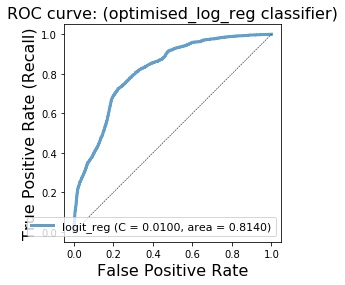

In [138]:
print("C= {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(0.01, accuracy_logit_reg, 
                                                                    roc_auc_logit_reg))
plt.plot(fpr_logit_reg, tpr_logit_reg, lw=3, alpha=0.7, 
             label='logit_reg (C = {:0.4f}, area = {:0.4f})'.format(0.01,roc_auc_logit_reg))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (optimised_log_reg classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

Average precision score: 0.0398 


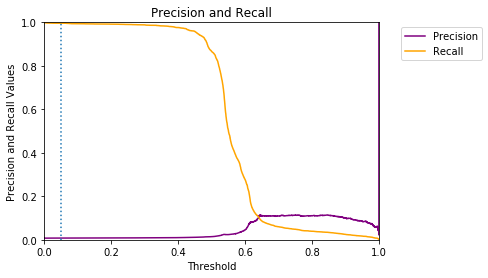

In [139]:
precision, recall, thresholds = precision_recall_curve(y_test_final, y_score_logit_reg[:,1])
average_precision = average_precision_score(y_test_final, y_score_logit_reg[:,1])
print('Average precision score: {0:0.4f} '.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.05,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [140]:
y_prob_test=pd.DataFrame(y_score_logit_reg[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.5 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test_final, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0       1  __all__
Actual                            
0          327329  247475   574804
1             554    3623     4177
__all__    327883  251098   578981


# XGBOOST

In [142]:
#loading Libraries
from xgboost import XGBClassifier
import xgboost
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


<b>For Full Feature

In [144]:
%%time
#Train the XGboost Model for Classification
model = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)
train_model = model.fit(X_train_res, y_train_res)
pred_class = train_model.predict(X_test)
pred = train_model.predict_proba(X_test)

Wall time: 17min 3s


In [145]:
fpr_xg, tpr_xg, _ = roc_curve(y_test, pred[:,1])
roc_auc_xg = auc(fpr_xg, tpr_xg)
accuracy_xg= train_model.score(X_test, y_test)
print(" AUC = {:.4f} accuracy={:.4f}".format(roc_auc_xg,accuracy_xg))

 AUC = 0.9427 accuracy=0.9625


Average precision score: 0.1836 


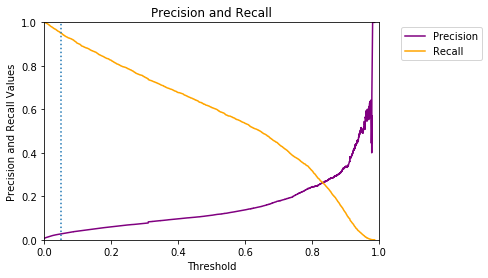

In [146]:
precision, recall, thresholds = precision_recall_curve(y_test, pred[:,1])
average_precision = average_precision_score(y_test, pred[:,1])
print('Average precision score: {0:0.4f} '.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.05,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [147]:
y_prob_test=pd.DataFrame(pred[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.5 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          554736  20063   574799
1            1636   2546     4182
__all__    556372  22609   578981


<b>For Feature Selected Data

In [148]:
%%time
#Train the XGboost Model for Classification
model = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)
train_model = model.fit(X_train_over, y_train_over)
pred_class = train_model.predict(X_test_final)
pred = train_model.predict_proba(X_test_final)

Wall time: 7min 19s


In [149]:
fpr_xg, tpr_xg, _ = roc_curve(y_test_final, pred[:,1])
roc_auc_xg = auc(fpr_xg, tpr_xg)
accuracy_xg= train_model.score(X_test_final, y_test_final)
print(" AUC = {:.4f} accuracy={:.4f}".format(roc_auc_xg,accuracy_xg))

 AUC = 0.9373 accuracy=0.9534


Average precision score: 0.1684 


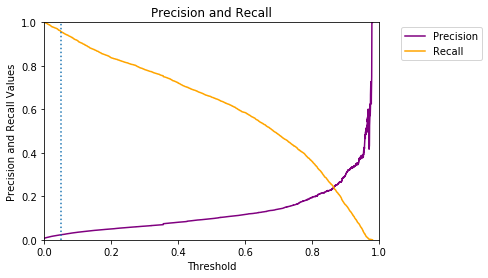

In [150]:
precision, recall, thresholds = precision_recall_curve(y_test_final, pred[:,1])
average_precision = average_precision_score(y_test_final, pred[:,1])
print('Average precision score: {0:0.4f} '.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.05,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

In [152]:
y_prob_test=pd.DataFrame(pred[:,1],columns=['prob'])
y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < 0.5 else 1)
y_prob_test_class=np.array(y_prob_test_class)
#Confusion Matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test_final, y_prob_test_class)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted       0      1  __all__
Actual                           
0          549274  25530   574804
1            1435   2742     4177
__all__    550709  28272   578981
